In [2]:
#librerias para análisis de datos y procesamiento de imagenes
#Agregamos algunas no utilizadas en la cursada para poder hacer los analisis y graficos
#!pip install rasterio geopandas --quiet
!pip install rasterio
!pip install rioxarray --quiet
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install rioxarray --quiet
import rioxarray as rxr
from pyproj import Proj, transform
import numpy as np
from rasterio.enums import Resampling
from sklearn.cluster import KMeans
from skimage.measure import find_contours
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
#librerias para descargar archivos
!pip install -q gdown
import gdown
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.5 MB/s eta 0:00:00


In [3]:
#Cargamos los archivos de las imagenes
# Creamos carpeta destino en Colab
os.makedirs("data", exist_ok=True)

# Descargamos las imágenes desde google drive
folder_id = "1c5dmFIuXIyP_K1z0jeJ1MHIDjF5vjSys?usp=drive_link"
gdown.download_folder(id=folder_id, output="data", quiet=False)

Retrieving folder contents


Processing file 1lxuIhgUZmiC--ie9aULXBxYPGcSJ31mD LC08_L2SP_229082_20231122_20231128_02_T1_SR_B3.TIF
Processing file 1NkRgfXSSB3e6UAm4JNWw-yYrkiIE_lmD LC08_L2SP_229082_20231122_20231128_02_T1_SR_B4.TIF
Processing file 1CuGtYmYs6kKVVtvd4yhfUfOVJFH4i0mG LC08_L2SP_229082_20231122_20231128_02_T1_SR_B5.TIF
Processing file 1nOCkWPTq_5TvkzqtarmZod3wG9tF0DFY LC08_L2SP_229082_20231122_20231128_02_T1_SR_B7.TIF
Processing file 1MIQhxOA0xvHDExwAGzuVKfoSBvjTs2j9 LC09_L2SP_229082_20230927_20230929_02_T1_SR_B3.TIF
Processing file 1ZIwwfkUxHBV1BuxTsCZfBYhL4njyQYHW LC09_L2SP_229082_20230927_20230929_02_T1_SR_B4.TIF
Processing file 1FcoTyAE5AWNorFO3kwNjMu9szTkeDcFq LC09_L2SP_229082_20230927_20230929_02_T1_SR_B5.TIF
Processing file 1z6aInI1zrruDOjWYlNDfDsde6XVrogS2 LC09_L2SP_229082_20230927_20230929_02_T1_SR_B7.TIF


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1lxuIhgUZmiC--ie9aULXBxYPGcSJ31mD
To: /content/data/LC08_L2SP_229082_20231122_20231128_02_T1_SR_B3.TIF
100%|██████████| 90.4M/90.4M [00:00<00:00, 104MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NkRgfXSSB3e6UAm4JNWw-yYrkiIE_lmD
To: /content/data/LC08_L2SP_229082_20231122_20231128_02_T1_SR_B4.TIF
100%|██████████| 93.3M/93.3M [00:00<00:00, 139MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CuGtYmYs6kKVVtvd4yhfUfOVJFH4i0mG
To: /content/data/LC08_L2SP_229082_20231122_20231128_02_T1_SR_B5.TIF
100%|██████████| 95.1M/95.1M [00:00<00:00, 95.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nOCkWPTq_5TvkzqtarmZod3wG9tF0DFY
To: /content/data/LC08_L2SP_229082_20231122_20231128_02_T1_SR_B7.TIF
100%|██████████| 96.0M/96.0M [00:01<00:00, 61.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MIQhxOA0xvHD

['data/LC08_L2SP_229082_20231122_20231128_02_T1_SR_B3.TIF',
 'data/LC08_L2SP_229082_20231122_20231128_02_T1_SR_B4.TIF',
 'data/LC08_L2SP_229082_20231122_20231128_02_T1_SR_B5.TIF',
 'data/LC08_L2SP_229082_20231122_20231128_02_T1_SR_B7.TIF',
 'data/LC09_L2SP_229082_20230927_20230929_02_T1_SR_B3.TIF',
 'data/LC09_L2SP_229082_20230927_20230929_02_T1_SR_B4.TIF',
 'data/LC09_L2SP_229082_20230927_20230929_02_T1_SR_B5.TIF',
 'data/LC09_L2SP_229082_20230927_20230929_02_T1_SR_B7.TIF']

In [4]:
# Ruta de los archivos antes del incendio
b3_antes='data/LC09_L2SP_229082_20230927_20230929_02_T1_SR_B3.TIF'
b4_antes='data/LC09_L2SP_229082_20230927_20230929_02_T1_SR_B4.TIF'
b5_antes='data/LC09_L2SP_229082_20230927_20230929_02_T1_SR_B5.TIF'
swir_antes='data/LC09_L2SP_229082_20230927_20230929_02_T1_SR_B7.TIF'

# Ruta de los archivos despues del incendio
b3_desp='data/LC08_L2SP_229082_20231122_20231128_02_T1_SR_B3.TIF'
b4_desp='data/LC08_L2SP_229082_20231122_20231128_02_T1_SR_B4.TIF'
b5_desp='data/LC08_L2SP_229082_20231122_20231128_02_T1_SR_B5.TIF'
swir_desp='data/LC08_L2SP_229082_20231122_20231128_02_T1_SR_B7.TIF'

In [5]:
# abrimos las imagenes como arrays bidimensionales
# Descaramos los datos nulos ya que no afecta tirar algun dato por la gran cantidad que hay
# el squeeze elimina las dimensiones de tamaño 1 para trabajar solo con arrays 2D
# "masked = True" asegura que se ignoren los valores nulos (por ejemplo afuera del área de interés)

b3_antes = rxr.open_rasterio(b3_antes, masked=True).squeeze()
b4_antes = rxr.open_rasterio(b4_antes, masked=True).squeeze()
b5_antes = rxr.open_rasterio(b5_antes, masked=True).squeeze()
swir_antes = rxr.open_rasterio(swir_antes, masked=True).squeeze()
b3_desp = rxr.open_rasterio(b3_desp, masked=True).squeeze()
b4_desp = rxr.open_rasterio(b4_desp, masked=True).squeeze()
b5_desp = rxr.open_rasterio(b5_desp, masked=True).squeeze()
swir_desp = rxr.open_rasterio(swir_desp, masked=True).squeeze()

In [6]:
# vamos a trabajar solo con la zona aledaña al incendio
# definimos el rango de pixeles en el que vamos a trabajar recortando los datos al intervalo elegido
fila_ini=2000
fila_fin=3001
col_ini=2000
col_fin=3001

In [ ]:
# las imagenes de antes y desp del incendio no estan alineadas ->los pixeles no representan las mismas zonas geograficas
# vamos a alinear las imagenes con reproject_match que aprovecha la info geoespacial que nos brindan los archivos.tif
# utilizamos la interpolación binomial porque tiene un buen equilibrio entre suavidad y precisión ( y es mas o menos rapido)

In [7]:
def alinear_bandas_a_recorte(bandas_desp_dict, bandas_antes_dict, fila_ini, fila_fin, col_ini, col_fin, metodo="bilinear"):
    """
    bandas_desp_dict: dict con bandas posteriores, ej. {"B4": b4_desp, "B5": b5_desp, "SWIR": swir_desp}
    bandas_antes_dict: dict con bandas previas, ej. {"B4": b4_antes, "B5": b5_antes, "SWIR": swir_antes}
    metodo: método de resampling ('bilinear', 'nearest', 'cubic', etc.)
    Returns: dict con bandas alineadas
    """

    resampling_dict = {
        "bilinear": Resampling.bilinear,
        "nearest": Resampling.nearest,
        "cubic": Resampling.cubic,
        "average": Resampling.average
    }

    bandas_alineadas = {}
    bandas_antes_crop_dict = {}

    for nombre in bandas_desp_dict.keys():
        #recorte imagenes antes del incendio
        banda_antes_crop = bandas_antes_dict[nombre].isel(
            y=slice(fila_ini, fila_fin),
            x=slice(col_ini, col_fin)
        )
        bandas_antes_crop_dict[nombre] = banda_antes_crop
        #reproyeccion de las imagenes desp
        banda_desp_aligned = bandas_desp_dict[nombre].rio.reproject_match(
            banda_antes_crop,
            resampling=resampling_dict.get(metodo, Resampling.bilinear)
        )

        bandas_alineadas[nombre] = banda_desp_aligned

    return bandas_alineadas, bandas_antes_crop_dict

In [8]:
# Alineamos las bandas
bandas_desp_dict = {"B4": b4_desp, "B5": b5_desp, "SWIR": swir_desp, "B3":b3_desp}
bandas_antes_dict = {"B4": b4_antes, "B5": b5_antes, "SWIR": swir_antes, "B3":b3_antes}
bandas_alineadas, bandas_antes_crop_dict = alinear_bandas_a_recorte(bandas_desp_dict, bandas_antes_dict, fila_ini, fila_fin, col_ini, col_fin)

In [ ]:
# chequeamos la alineación para el caso de b4 (El resto no los cargamos para no sobrecargar el archivo)
def comparar_alineacion(banda_antes_crop, banda_desp_aligned, nombre="Banda"):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    banda_antes_crop.plot(ax=axes[0], cmap='gray')
    axes[0].set_title(f"{nombre} - Antes (recorte)")

    banda_desp_aligned.plot(ax=axes[1], cmap='gray')
    axes[1].set_title(f"{nombre} - Después (alineada)")

    plt.tight_layout()
    plt.show()

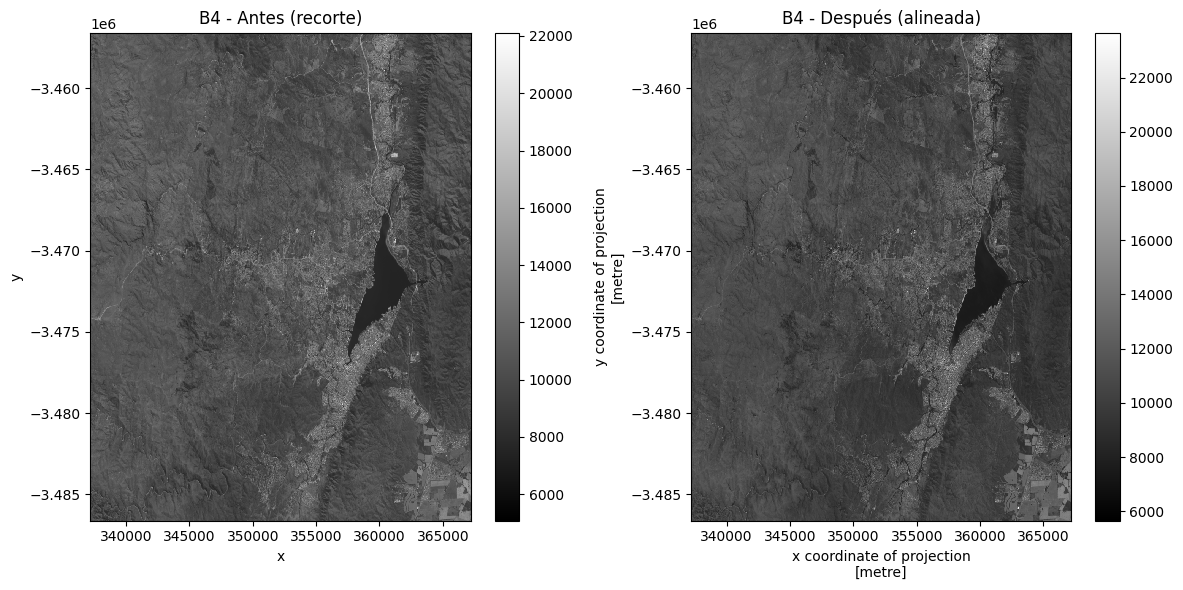

In [ ]:
comparar_alineacion(bandas_antes_crop_dict["B4"], bandas_alineadas["B4"], nombre="B4")

In [9]:
# Calculamos índices necesarios para diferencias las regiones dentro del mapa

# NDVI: (nir - red) / (nir + red)-> (nir==b5, red==b4) ; El NDVI mide la salud de la vegetación viva.
# Las plantas sanas reflejan mucho NIR y absorben el rojo (para la fotosíntesis).
# Cuanto mas alto mayor vegetacion
ndvi_pre  = (bandas_antes_crop_dict["B5"] - bandas_antes_crop_dict["B4"]) / (bandas_antes_crop_dict["B5"] + bandas_antes_crop_dict["B4"])
ndvi_post = (bandas_alineadas["B5"] - bandas_alineadas["B4"]) / (bandas_alineadas["B5"] + bandas_alineadas["B4"])
delta_ndvi = ndvi_post - ndvi_pre

# NBR: (nir - swir) / (nir + swir) -> (swir==b7) ; El NBR se usa para detectar áreas quemadas y cambios en la vegetación debido al fuego.
# La vegetación sana tiene alto NIR y bajo SWIR. Después de un incendio, el NIR baja y el SWIR sube, NBR disminuye.
# Cuanto mas alto mayor daño de fuego
nbr_pre  = (bandas_antes_crop_dict["B5"] - bandas_antes_crop_dict["SWIR"]) / (bandas_antes_crop_dict["B5"] + bandas_antes_crop_dict["SWIR"])
nbr_post = (bandas_alineadas["B5"] - bandas_alineadas["SWIR"]) / (bandas_alineadas["B5"] + bandas_alineadas["SWIR"])
dnbr = nbr_post - nbr_pre

# NDWI: (green-nir/green+nir) ->indice de agua normalizado ->(green=b3) ; El NDWI sirve para detectar cuerpos de agua y humedad en la vegetación.
# El agua refleja bien en el verde y absorbe mucho en el NIR da valores altos.
ndwi_pre = (bandas_antes_crop_dict["B3"] - bandas_antes_crop_dict["B5"]) / (bandas_antes_crop_dict["B3"] + bandas_antes_crop_dict["B5"])
ndwi_post = (bandas_alineadas["B3"] - bandas_alineadas["B5"]) / (bandas_alineadas["B3"] + bandas_alineadas["B5"])
delta_ndwi = ndwi_post - ndwi_pre

In [10]:
# Creamos el dataframe con los indices de cada uno de los pixeles
h, w = bandas_antes_crop_dict["B4"].shape
filas, columnas = np.meshgrid(np.arange(h), np.arange(w), indexing='ij')

df_connulos = pd.DataFrame({
    "fila": filas.flatten(),
    "columna": columnas.flatten(),
    "red_pre": bandas_antes_crop_dict["B4"].values.flatten(),
    "red_post": bandas_alineadas["B4"].values.flatten(),
    "nir_pre": bandas_antes_crop_dict["B5"].values.flatten(),
    "nir_post": bandas_alineadas["B5"].values.flatten(),
    "ndvi_pre": ndvi_pre.values.flatten(),
    "ndvi_post": ndvi_post.values.flatten(),
    "delta_ndwi": delta_ndwi.values.flatten(),
    "ndwi_pre": ndwi_pre.values.flatten(),
    "ndwi_post": ndwi_post.values.flatten(),
    "delta_ndvi": delta_ndvi.values.flatten(),
    "dnbr": dnbr.values.flatten()
})

df = df_connulos.dropna().reset_index(drop=True)

In [ ]:
df_connulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002001 entries, 0 to 1002000
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   fila        1002001 non-null  int64  
 1   columna     1002001 non-null  int64  
 2   red_pre     1002001 non-null  float32
 3   red_post    1002001 non-null  float32
 4   nir_pre     1002001 non-null  float32
 5   nir_post    1002001 non-null  float32
 6   ndvi_pre    1002001 non-null  float32
 7   ndvi_post   1002001 non-null  float32
 8   delta_ndwi  1002001 non-null  float32
 9   ndwi_pre    1002001 non-null  float32
 10  ndwi_post   1002001 non-null  float32
 11  delta_ndvi  1002001 non-null  float32
 12  dnbr        1002001 non-null  float32
dtypes: float32(11), int64(2)
memory usage: 57.3 MB


In [ ]:
#no hay datos nulos!

In [ ]:
df.head()

fila  columna  red_pre  red_post  nir_pre  nir_post  ndvi_pre  ndvi_post  \
0     0        0  11824.0   12190.0  15831.0   16972.0  0.144892   0.163981   
1     0        1  11686.0   12052.0  15938.0   16850.0  0.153924   0.166009   
2     0        2  10936.0   11338.0  16221.0   17249.0  0.194609   0.206772   
3     0        3  10947.0   11183.0  15959.0   16949.0  0.186278   0.204962   
4     0        4  10742.0   11279.0  15319.0   16722.0  0.175626   0.194386   

   delta_ndwi  ndwi_pre  ndwi_post  delta_ndvi      dnbr  
0   -0.018235 -0.181242  -0.199477    0.019088  0.026045  
1   -0.010023 -0.192518  -0.202541    0.012085  0.025282  
2   -0.014480 -0.220680  -0.235159    0.012163  0.023392  
3   -0.007541 -0.217408  -0.224949    0.018684  0.021572  
4   -0.019648 -0.199468  -0.219116    0.018760  0.018086

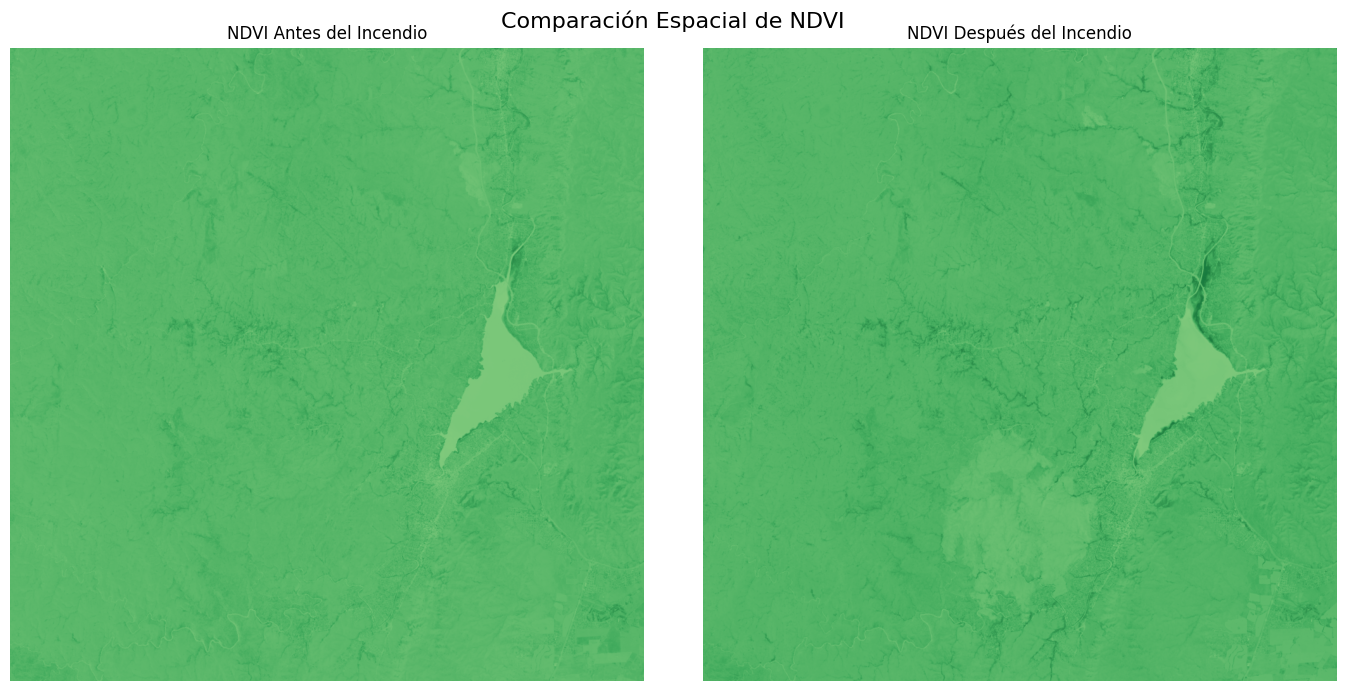

In [ ]:
#graficos geoespaciales en funcion a los indices

# Reconstruimos las imágenes NDVI desde el DataFrame
ndvi_pre_img = np.full((h, w), np.nan)
ndvi_post_img = np.full((h, w), np.nan)

ndvi_pre_img[df['fila'], df['columna']] = df['ndvi_pre']
ndvi_post_img[df['fila'], df['columna']] = df['ndvi_post']

# Graficamos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharex=True, sharey=True)

im1 = axes[0].imshow(ndvi_pre_img, cmap='YlGn', vmin=-1, vmax=1)
axes[0].set_title("NDVI Antes del Incendio")
axes[0].axis('off')

im2 = axes[1].imshow(ndvi_post_img, cmap='YlGn', vmin=-1, vmax=1)
axes[1].set_title("NDVI Después del Incendio")
axes[1].axis('off')

#fig.colorbar(im2, ax=axes.ravel().tolist(), shrink=0.8, label='NDVI')
plt.suptitle("Comparación Espacial de NDVI", fontsize=16)
plt.tight_layout()
plt.show()

Como era de esperarse, en la segunda imagen despues del incendio, se puede ver una mancha mas clara en el mapa, la cual denota que se tiene una region en la cual se tiene un diferente indice de NDVI. Esto tiene sentido ya que el mismo muestra un nivel alto de vegetacion, por lo que en las zonas mas cercanas al lago se puede ver un tono mas oscuro debido a la alta vegetacion, y en la zona del incendio es mas claro ya que no se tiene tanta vegetacion debido al incendio.

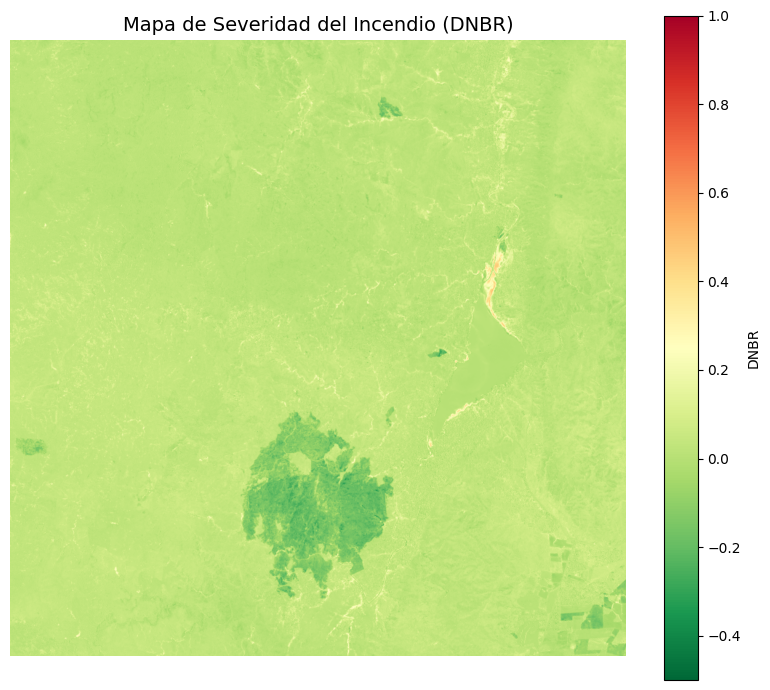

In [ ]:
# Reconstruimos el mapa con el indice DNBR
# No hace falta mostrar el antes y el despues ya que estamos viendo el efecto del incendio
# Si no hubo un incendio antes no hay nada que analizar
dnbr_img = np.full((h, w), np.nan)
dnbr_img[df['fila'], df['columna']] = df['dnbr']

# Mapa DNBR
plt.figure(figsize=(8, 7))
plt.imshow(dnbr_img, cmap='RdYlGn_r', vmin=-0.5, vmax=1.0)
plt.title("Mapa de Severidad del Incendio (DNBR)", fontsize=14)
plt.colorbar(label='DNBR')
plt.axis('off')
plt.tight_layout()
plt.show()

Al igual que en la imagen anterior, era de esperar que la imagen se vea asi ya que se tiene un indice mayor de DNBR en la region donde se tuvo un incendio.

In [ ]:
#PARTE 1
#       -> APRENDIZAJE NO SUPERVISADO
#       -> DETECCIÓN DE ZONAS AFECTADAS POR INCENDIOS FORESTALES A TRAVES DE MÉTODOS DE CLUSTERING

In [11]:
# CLUSTERING -> ¿podemos reconocer las zonas afectadas?
# trabajamos con conjuntos de pixeles porque trabajar uno a uno  es muy pesado.Además nnos interesan propiedades globales del terreno.
# dividimos la imagen en bloques de 10x10 pixeles y usamos estadisticos de los indices para caracterizarlos

block_size = 10
height, width = bandas_antes_crop_dict["B4"].shape

features_agg = []

for row_start in range(0, height, block_size):
    for col_start in range(0, width, block_size):
        # Definimos el bloque
        row_end = min(row_start + block_size, height)
        col_end = min(col_start + block_size, width)

        # Extraemos bloque para cada banda / índice
        red_block_pre = bandas_antes_crop_dict['B4'].values[row_start:row_end, col_start:col_end]
        nir_block_pre = bandas_antes_crop_dict['B5'].values[row_start:row_end, col_start:col_end]
        swir_block_pre = bandas_antes_crop_dict['SWIR'].values[row_start:row_end, col_start:col_end]

        red_block_post = bandas_alineadas['B4'].values[row_start:row_end, col_start:col_end]
        nir_block_post = bandas_alineadas['B5'].values[row_start:row_end, col_start:col_end]
        swir_block_post = bandas_alineadas['SWIR'].values[row_start:row_end, col_start:col_end]

        # Índices
        ndvi_block_pre  = (nir_block_pre - red_block_pre) / (nir_block_pre + red_block_pre)
        ndvi_block_post = (nir_block_post - red_block_post) / (nir_block_post + red_block_post)
        delta_ndvi_block = ndvi_block_post - ndvi_block_pre

        nbr_block_pre  = (nir_block_pre - swir_block_pre) / (nir_block_pre + swir_block_pre)
        nbr_block_post = (nir_block_post - swir_block_post) / (nir_block_post + swir_block_post)
        dnbr_block = nbr_block_pre - nbr_block_post

        ndwi_block_pre = (red_block_pre - nir_block_pre) /(red_block_pre + nir_block_pre)
        ndwi_block_post = (red_block_post - nir_block_post) /(red_block_post + nir_block_post)
        delta_ndwi_block = ndwi_block_post - ndwi_block_pre

        # estadísticas por bloque
          # Features
        features_agg.append({
                "row_start": row_start,
                "col_start": col_start,

                # Promedios espectrales
                "red_pre_mean": np.nanmean(red_block_pre),
                "nir_pre_mean": np.nanmean(nir_block_pre),
                "swir_pre_mean": np.nanmean(swir_block_pre),
                "red_post_mean": np.nanmean(red_block_post),
                "nir_post_mean": np.nanmean(nir_block_post),
                "swir_post_mean": np.nanmean(swir_block_post),

                # NDVI
                "ndvi_pre_mean": np.nanmean(ndvi_block_pre),
                "ndvi_post_mean": np.nanmean(ndvi_block_post),
                "ndvi_pre_min": np.nanmin(ndvi_block_pre),
                "ndvi_post_min": np.nanmin(ndvi_block_post),
                "ndvi_pre_max": np.nanmax(ndvi_block_pre),
                "ndvi_post_max": np.nanmax(ndvi_block_post),
                "ndvi_pre_std": np.nanstd(ndvi_block_pre),
                "ndvi_post_std": np.nanstd(ndvi_block_post),

                # ΔNDVI
                "delta_ndvi_mean": np.nanmean(delta_ndvi_block),
                "delta_ndvi_median": np.nanmedian(delta_ndvi_block),
                "delta_ndvi_max": np.nanmax(delta_ndvi_block),
                "delta_ndvi_min": np.nanmin(delta_ndvi_block),
                "delta_ndvi_std": np.nanstd(delta_ndvi_block),
                "delta_ndvi_extreme_pct": np.mean(np.abs(delta_ndvi_block) > 0.5),

                # dNBR
                "dnbr_mean": np.nanmean(dnbr_block),
                "dnbr_max": np.nanmax(dnbr_block),
                "dnbr_min": np.nanmin(dnbr_block),
                "dnbr_std": np.nanstd(dnbr_block),

                #NDWI:
                "ndwi_pre_mean": np.nanmean(ndwi_block_pre),
                "ndwi_post_mean": np.nanmean(ndwi_block_post),
                "ndwi_pre_min": np.nanmin(ndwi_block_pre),
                "ndwi_post_min": np.nanmin(ndwi_block_post),
                "ndwi_pre_max": np.nanmax(ndwi_block_pre),
                "ndwi_post_max": np.nanmax(ndwi_block_post),
                "ndwi_pre_std": np.nanstd(ndwi_block_pre),
                "ndwi_post_std": np.nanstd(ndwi_block_post),

                #DNDWI:
                "delta_ndwi_mean": np.nanmean(delta_ndwi_block),
                "delta_ndwi_median": np.nanmedian(delta_ndwi_block),
                "delta_ndwi_max": np.nanmax(delta_ndwi_block),
                "delta_ndwi_min": np.nanmin(delta_ndwi_block),
                "delta_ndwi_std": np.nanstd(delta_ndwi_block),
                "delta_ndwi_extreme_pct": np.mean(np.abs(delta_ndwi_block) > 0.5),
            })

df_blocks = pd.DataFrame(features_agg)

In [ ]:
df_blocks.head()

row_start  col_start  red_pre_mean  nir_pre_mean  swir_pre_mean  \
0          0          0  10991.450195  15390.719727   15464.500000   
1          0         10  11387.709961  14897.780273   15418.169922   
2          0         20  11337.150391  15007.160156   16321.139648   
3          0         30  11397.889648  15141.660156   17108.230469   
4          0         40  10918.349609  14687.459961   15611.980469   

   red_post_mean  nir_post_mean  swir_post_mean  ndvi_pre_mean  \
0   11343.000000   16501.310547    15884.309570       0.166074   
1   11393.809570   15258.009766    15187.719727       0.132918   
2   11642.860352   16070.440430    16537.650391       0.139101   
3   11733.849609   16051.160156    17294.890625       0.140846   
4   11366.839844   15815.709961    16100.940430       0.146751   

   ndvi_post_mean  ...  ndwi_pre_max  ndwi_post_max  ndwi_pre_std  \
0        0.184600  ...     -0.099188      -0.116698      0.028354   
1        0.144451  ...     -0.092338      -0.101711      0.017187   
2        0.159874  ...     -0.111378      -0.139615      0.010103   
3        0.155160  ...     -0.118217      -0.136520      0.016822   
4        0.163544  ...     -0.109471      -0.138558      0.021209   

   ndwi_post_std  delta_ndwi_mean  delta_ndwi_median  delta_ndwi_max  \
0       0.029136        -0.018526          -0.016126        0.015652   
1       0.019423        -0.011532          -0.009211        0.014395   
2       0.014490        -0.020773          -0.016969        0.007431   
3       0.015067        -0.014315          -0.012640        0.013608   
4       0.018629        -0.016793          -0.016019        0.010918   

   delta_ndwi_min  delta_ndwi_std  delta_ndwi_extreme_pct  
0       -0.083823        0.015489                     0.0  
1       -0.098718        0.013599                     0.0  
2       -0.076562        0.015714                     0.0  
3       -0.050586        0.011340                     0.0  
4       -0.062072        0.014852                     0.0  

[5 rows x 40 columns]

In [15]:
df_blocks.to_csv("dataset.csv", index=False)


In [ ]:
df_blocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10201 entries, 0 to 10200
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   row_start               10201 non-null  int64  
 1   col_start               10201 non-null  int64  
 2   red_pre_mean            10201 non-null  float32
 3   nir_pre_mean            10201 non-null  float32
 4   swir_pre_mean           10201 non-null  float32
 5   red_post_mean           10201 non-null  float32
 6   nir_post_mean           10201 non-null  float32
 7   swir_post_mean          10201 non-null  float32
 8   ndvi_pre_mean           10201 non-null  float32
 9   ndvi_post_mean          10201 non-null  float32
 10  ndvi_pre_min            10201 non-null  float32
 11  ndvi_post_min           10201 non-null  float32
 12  ndvi_pre_max            10201 non-null  float32
 13  ndvi_post_max           10201 non-null  float32
 14  ndvi_pre_std            10201 non-null

In [ ]:
df_blocks.describe()

row_start     col_start  red_pre_mean  nir_pre_mean  swir_pre_mean  \
count  10201.000000  10201.000000  10201.000000  10201.000000   10201.000000   
mean     500.000000    500.000000  10533.445312  14194.382812   14457.558594   
std      291.561886    291.561886    872.950195   1345.966919    1774.241943   
min        0.000000      0.000000   7444.720215   7328.140137    7317.060059   
25%      250.000000    250.000000   9986.099609  13480.969727   13406.410156   
50%      500.000000    500.000000  10534.089844  14166.780273   14620.790039   
75%      750.000000    750.000000  11037.610352  14867.419922   15728.339844   
max     1000.000000   1000.000000  14642.900391  20032.560547   19219.000000   

       red_post_mean  nir_post_mean  swir_post_mean  ndvi_pre_mean  \
count   10201.000000   10201.000000    10201.000000   10201.000000   
mean    10742.987305   15201.224609    14762.593750       0.146975   
std       901.998413    1529.640747     1748.214966       0.027338   
min      7513.569824    7384.740234     7410.089844      -0.040853   
25%     10175.209961   14552.099609    13758.799805       0.135782   
50%     10742.940430   15268.019531    14944.089844       0.145983   
75%     11294.690430   15943.639648    16003.139648       0.158928   
max     15188.240234   28983.380859    20115.500000       0.302952   

       ndvi_post_mean  ...  ndwi_pre_max  ndwi_post_max  ndwi_pre_std  \
count    10201.000000  ...  10201.000000   10201.000000  10201.000000   
mean         0.170310  ...     -0.106853      -0.125673      0.020049   
std          0.034528  ...      0.030697       0.036420      0.013184   
min         -0.025638  ...     -0.210833      -0.383546      0.000000   
25%          0.156214  ...     -0.124124      -0.147510      0.011322   
50%          0.169954  ...     -0.114228      -0.135300      0.016510   
75%          0.185960  ...     -0.099817      -0.114220      0.024866   
max          0.539364  ...      0.068947       0.078359      0.157050   

       ndwi_post_std  delta_ndwi_mean  delta_ndwi_median  delta_ndwi_max  \
count   10201.000000     10201.000000       10201.000000    10201.000000   
mean        0.023971        -0.023335          -0.022030        0.008014   
std         0.017410         0.021689           0.021642        0.026396   
min         0.000000        -0.363073          -0.379510       -0.143753   
25%         0.012334        -0.033132          -0.031656       -0.008184   
50%         0.018957        -0.024401          -0.023128        0.001967   
75%         0.030322        -0.015466          -0.014683        0.016302   
max         0.194924         0.112481           0.112635        0.186419   

       delta_ndwi_min  delta_ndwi_std  delta_ndwi_extreme_pct  
count    10201.000000    10201.000000            10201.000000  
mean        -0.066617        0.014391                0.000059  
std          0.044767        0.011241                0.002090  
min         -0.568473        0.000000                0.000000  
25%         -0.080881        0.008119                0.000000  
50%         -0.059145        0.011514                0.000000  
75%         -0.042267        0.017276                0.000000  
max          0.081977        0.178561                0.110000  

[8 rows x 40 columns]

In [ ]:
# vamos a cluterizar usando  k-means -> queremos poder interpretar los clusters para evaluar daños
# recordamos que k-means labura con la medida euclidia y en espacios de dimension muy grande esta pierde sentido -> hacemos PCA

In [ ]:
# nos interesa definir nuestro problema en función a
# las componentes que expliquen mayor varianza -> necesitamos ordenes comparables para tener varianzas comparables
#-> escalamos las variables
#usamos standard scales -> tranformamos todos los datos a datos con varianza 1 y media 0.
#PCA se basa en varianza, así que centrar en 0 y escalar por desviación estándar es util.
#KMeans se basa en distancia euclidiana, que asume variables centradas y con varianza similar.
scaler = StandardScaler()
df_blocks_scaled = scaler.fit_transform(df_blocks)
# Restamos el promedio y dividimos por la varianza de cada variable -> varianzas comparables

In [ ]:
#varianza explicada -> con esto inferimos el numero de dimensiones para hacer pca
pca = PCA() # inicializamos pca sin parametros iniciales-> calcula todas las componentes -> autovectores
            # de la matriz de covarianza -> mantiene la dimensión del problema
pca.fit(df_blocks_scaled) # calculamos los autovectores -> nuestras componentes
explained_variance_ratio = pca.explained_variance_ratio_ # ∝ autovalores

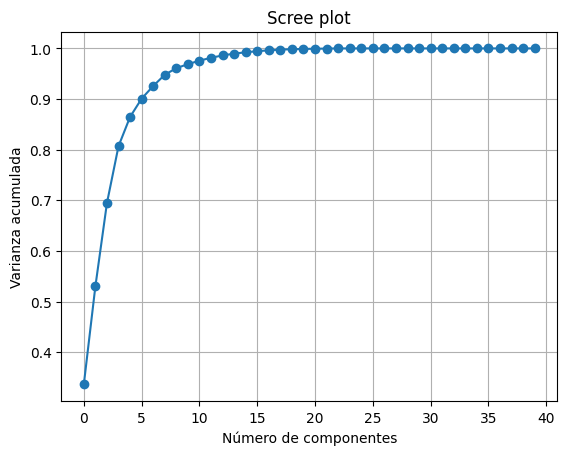

In [ ]:
#graficamos la varianza acumulada para poder ver el numero de componentes que describe la mayor cantidad de varianza
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Scree plot')
plt.grid(True)
plt.show()

In [ ]:
#veamos si podemos reducir más componentes si explicamos el 85% de la varianza y trabajemos con dichas componentes.
var_acumulada = np.cumsum(explained_variance_ratio) #suma acumulada
n_componentes_85 = np.argmax(var_acumulada >= 0.85) + 1  # +1 porque el índice de las componentes empieza en 0

print(f'Se necesitan {n_componentes_85} componentes para explicar al menos el 85% de la varianza.')

Se necesitan 5 componentes para explicar al menos el 85% de la varianza.


In [ ]:
#reducimos a los 5 componentes que nos indica el grafico que explican la mayor cantidad de varianza acumulada
pca = PCA(n_components=5)
df_pca = pca.fit_transform(df_blocks_scaled)
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i}' for i in range(1, 6)])

In [ ]:
# clusterizacion usando k-means -> definimos el numero de clusters
# probemos varios valores de clusters y analicemos los valores de inercia y  silhouette.

In [ ]:
k_values=range(1,30) #cantidad de clusters
#calculemos los valores de inercia primero -> suma sobre todos los clusters
#de la suma de distancias al centro de cada cluster
inertias=[]
for k in k_values:
  kmeans=KMeans(n_clusters=k,random_state=42)
#-> definimos el random_state asi cada vez que corremos el codigo
#los centroides se definen igual -> convergemos a la misma sol
  kmeans.fit(df_pca)
  inertias.append(kmeans.inertia_)

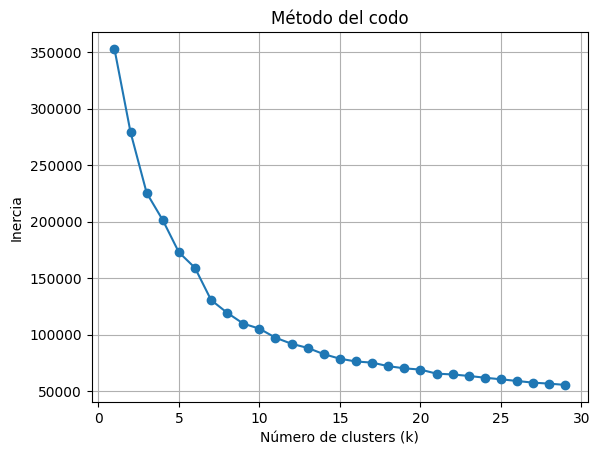

In [ ]:
# ploteamos los valores de k vs el valor de inercia
# queremos ver en que punto el descenso del valor de incercia deja de ser significativo
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.grid(True)
plt.show()

In [ ]:
#calculemos ahora el valor de  silhouette ->
# para cada punto calcula "que tan bien ubicado esta" y devuelve el promedio de todos los puntos

k_values=range(2,30) #arrancamos de 2 ya que mide distancias a otros clusters-> no tiene sentido si hay uno solo
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=42)
    labels = kmeans.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, labels))

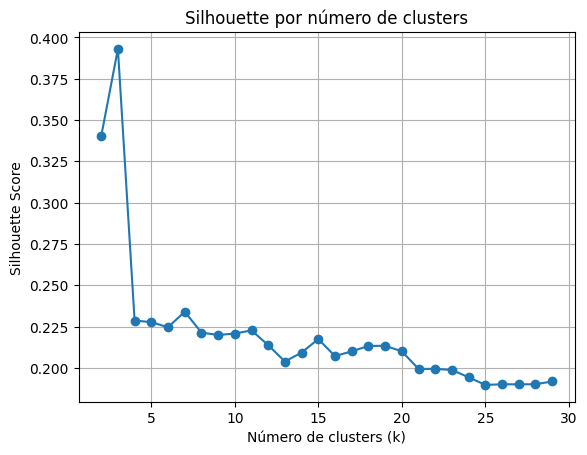

In [ ]:
#ploteamos los valores de Silhouette Score
plt.plot(range(2, 30), silhouette_scores, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette por número de clusters')
plt.grid(True)
plt.show()

Se puede ver que el numero optimo de clusters por el metodo de KMeans deberia ser de 6

In [ ]:
#separamos el train set
# 30% train, 70% test, esto capaz se puede mejorar (pero en principio nos ayuda con la complejidad temporal)-> ¿ es poco el train?
train_df, test_df = train_test_split(df_pca, test_size=0.7, random_state=42)

In [ ]:
# CLUSTERIZACION

In [ ]:
# Entrenamos
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(train_df)

#Predecimos los clusters para todos los bloques
df_blocks["kmeans_cluster"] = kmeans.predict(df_pca)

In [ ]:
#visualizamos los clusters -> k-means
n_rows = int(np.ceil(height / block_size))
n_cols = int(np.ceil(width / block_size))

# Mapa de clusters (inicializado en -1)
cluster_map_kmeans = np.full((n_rows, n_cols), -1)

# Completamos con etiquetas de cluster
for idx, row in df_blocks.iterrows():
    r = row["row_start"] // block_size
    c = row["col_start"] // block_size
    cluster_map_kmeans[int(r), int(c)] = row["kmeans_cluster"]

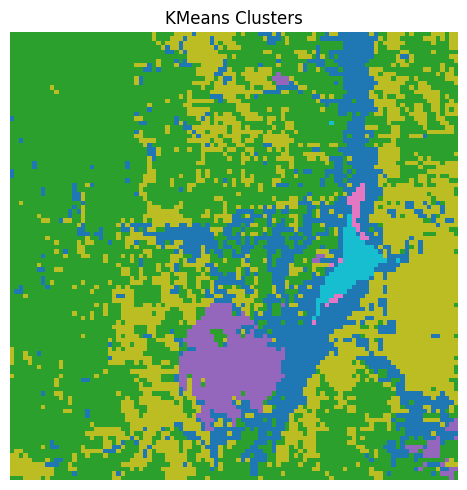

In [ ]:
#visualizamos los clusters haciendo el mapa de KMeans
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cluster_map_kmeans, cmap="tab10")
plt.title("KMeans Clusters")
plt.axis("off")
plt.tight_layout()
plt.show()

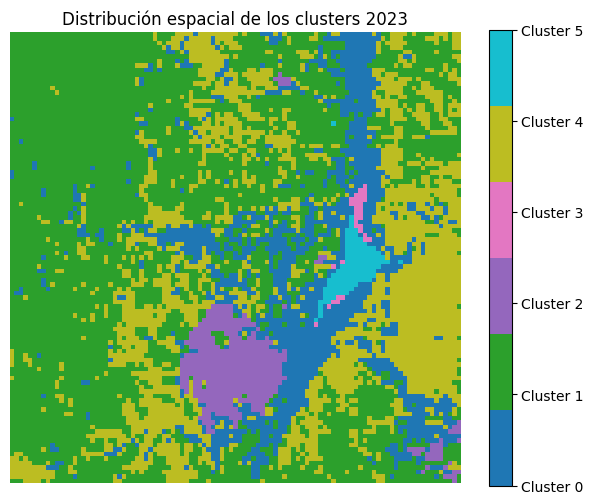

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

# Mostrar clusters con colores categóricos
cmap = plt.get_cmap("tab10", np.unique(cluster_map_kmeans).size)
im = plt.imshow(cluster_map_kmeans, cmap=cmap)
plt.title("Distribución espacial de los clusters 2023")
plt.axis("off")

# Agregar barra de color con ticks por cluster
cbar = plt.colorbar(im, ticks=np.arange(np.unique(cluster_map_kmeans).size))
cbar.set_ticks(np.arange(np.unique(cluster_map_kmeans).size))
cbar.set_ticklabels([f'Cluster {i}' for i in range(np.unique(cluster_map_kmeans).size)])

plt.tight_layout()
plt.show()

In [ ]:
#el modelo anda bien!

- Se puede ver en el grafico los diferentes clusters que se generan en la imagen con diferentes colores
- En las regiones de color verde se podria interpretar que hay una diferencia minima del indice NDVI por lo que se generan diferentes clusters, pero encimados entre si en diferentes regiones.
- En azul se puede ver una region que quizas este mas urbanizada o con algunas plantaciones, esto ya que se puede ver que esta un distribuido por todo el mapa, y si comparamos con la imagen real se puede ver que se tienen algunas construcciones en las regiones donde se exapnde este cluster
- En celeste esta el lago
- Por ultimo en rosa estan las zonas ya mencionadas que tienen un mayor nivel de vegetacion

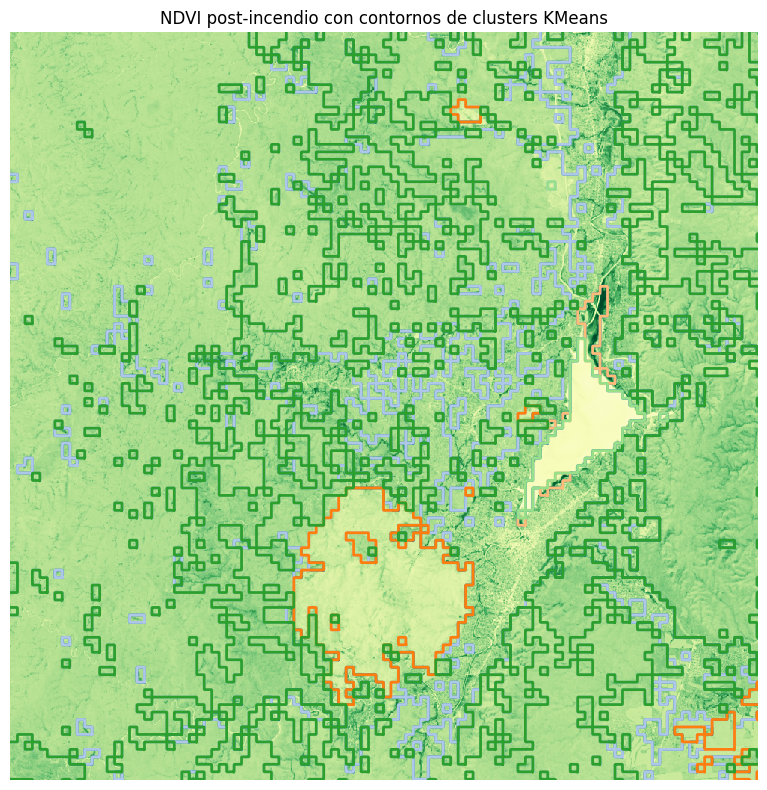

In [ ]:
# superponemos los clusters con el mapa ndvi post incendio
# Inicializamos el array completo de clusters KMeans
cluster_image_kmeans = np.full((height, width), -1)

# Rellenamos cada bloque con su etiqueta KMeans
for idx, row in df_blocks.iterrows():
    r0 = int(row["row_start"])
    c0 = int(row["col_start"])
    r1 = min(r0 + block_size, height)
    c1 = min(c0 + block_size, width)
    cluster_id = row["kmeans_cluster"]

    cluster_image_kmeans[r0:r1, c0:c1] = cluster_id

# Mapa NDVI post-incendio con contornos
plt.figure(figsize=(10, 8))
plt.imshow(ndvi_post.values, cmap="YlGn", interpolation="nearest")
plt.title("NDVI post-incendio con contornos de clusters KMeans")
plt.axis("off")

# Colores por cluster KMeans
unique_clusters = np.unique(cluster_image_kmeans)
colors = plt.cm.tab20.colors  # más variedad que tab10
color_map = {cid: colors[i % len(colors)] for i, cid in enumerate(unique_clusters) if cid != -1}

# Dibujamos contornos por cluster
for cluster_id, color in color_map.items():
    mask = cluster_image_kmeans == cluster_id
    contours = find_contours(mask.astype(float), level=0.5)
    for contour in contours:
        plt.plot(contour[:, 1], contour[:, 0], linewidth=2.0, color=color)

plt.tight_layout()
plt.show()

Lo que se puede ver en el grafico es que lo ya mencionado en el caso anterior se cumple de manera precisa, ya que al superponer ambos graficos se puede ver que tan fiel es la prediccion con lo que se tiene en la realidad

- se tienen regiones con clusters azules distribuidas por todo el mapa debido a pequeños asentamientos distribuidos o algunas pequeñas ciudades
- En diferentes tonos de verdes se tienen todas las regiones de vegetacion que no se quemaron
- En un rosa mas anaranjado claro se tienen las zonas de alta vegetacion cercanas al rio
- Por ultimo en naranja mas fuerte se tiene la zona done ocurrio el incendio, y algo que no necesariamente era tan obvio pero que con esta superposicion se puede ver de manera mas clara son algunos "incendio" en la region de abajo a la derecha, aunque mas que un incendio se puede pensar que es alguna quema de cultivos.

In [ ]:
 #interpretemos los clusters y asignemos un nivel de daño a cada uno

In [ ]:
#agrupamos los clusters segun los indices dnbr, ndvi, dndvi, dnwi, y delta_dnwi.
df_blocks.groupby('kmeans_cluster')[
    ['dnbr_mean', 'ndvi_post_mean', 'delta_ndvi_mean',
     'ndwi_post_mean', 'delta_ndwi_mean']
].mean()

dnbr_mean  ndvi_post_mean  delta_ndvi_mean  ndwi_post_mean  \
kmeans_cluster                                                               
0               -0.036055        0.191957         0.031662       -0.191957   
1               -0.027659        0.161878         0.022505       -0.161878   
2                0.128197        0.110599        -0.037178       -0.110599   
3               -0.161459        0.295802         0.195433       -0.295802   
4               -0.029314        0.189550         0.028428       -0.189550   
5               -0.006361        0.004619         0.011733       -0.004619   

                delta_ndwi_mean  
kmeans_cluster                   
0                     -0.031662  
1                     -0.022505  
2                      0.037178  
3                     -0.195433  
4                     -0.028428  
5                     -0.011733

In [ ]:
#observaciones
#solo el cluster 2 tiene dNBR > 0.1 → señal de afectación
#el cluster 5 es el único con NDVI casi nulo -> agua
#los clusters 0,1,4 son casi idénticos en comportamiento → vegetación sana
#el cluster 3 tiene NDVI alto (0.295), y dNBR muy negativo → vegetación incluso mejor post-incendio

In [ ]:
#aplicamos el modelo a una foto del terreno del 6/12/2025 -> 2 años despues
#observacion: hubiera sido util un pipeline ):

In [ ]:
#Cargamos los archivos de las imagenes
# Creamos carpeta destino en Colab
os.makedirs("data_1", exist_ok=True)

# Descargamos las imágenes desde google drive
folder_id = "https://drive.google.com/drive/folders/1akkG42Y0KDAPuiz1OZPTE6FISMeT6k19?usp=drive_link"
gdown.download_folder(id=folder_id, output="data", quiet=False)

Retrieving folder contents


Processing file 1Iw0lawNyQp8Pz4sXbGg3hz9enb_na8x1 LC09_L2SP_229082_20250612_20250613_02_T1_SR_B3.TIF
Processing file 1EngpSUOtR4tDKBy3kNEI30kA94e7FAxa LC09_L2SP_229082_20250612_20250613_02_T1_SR_B4.TIF
Processing file 1FlWls-uNvSBhhrgXpL1beP6OzFqiDsxg LC09_L2SP_229082_20250612_20250613_02_T1_SR_B5.TIF
Processing file 1psk5sMN09UG0ctHmYa-XIgrT19LTGBQ1 LC09_L2SP_229082_20250612_20250613_02_T1_SR_B7.TIF


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1Iw0lawNyQp8Pz4sXbGg3hz9enb_na8x1
To: /content/data/LC09_L2SP_229082_20250612_20250613_02_T1_SR_B3.TIF
100%|██████████| 88.0M/88.0M [00:00<00:00, 228MB/s]
Downloading...
From: https://drive.google.com/uc?id=1EngpSUOtR4tDKBy3kNEI30kA94e7FAxa
To: /content/data/LC09_L2SP_229082_20250612_20250613_02_T1_SR_B4.TIF
100%|██████████| 91.3M/91.3M [00:00<00:00, 142MB/s]
Downloading...
From: https://drive.google.com/uc?id=1FlWls-uNvSBhhrgXpL1beP6OzFqiDsxg
To: /content/data/LC09_L2SP_229082_20250612_20250613_02_T1_SR_B5.TIF
100%|██████████| 95.7M/95.7M [00:00<00:00, 156MB/s]
Downloading...
From: https://drive.google.com/uc?id=1psk5sMN09UG0ctHmYa-XIgrT19LTGBQ1
To: /content/data/LC09_L2SP_229082_20250612_20250613_02_T1_SR_B7.TIF
100%|██████████| 95.2M/95.2M [00:00<00:00, 220MB/s]
Download completed


['data/LC09_L2SP_229082_20250612_20250613_02_T1_SR_B3.TIF',
 'data/LC09_L2SP_229082_20250612_20250613_02_T1_SR_B4.TIF',
 'data/LC09_L2SP_229082_20250612_20250613_02_T1_SR_B5.TIF',
 'data/LC09_L2SP_229082_20250612_20250613_02_T1_SR_B7.TIF']

In [ ]:
#rutas
b3_desp_desp='data/LC09_L2SP_229082_20250612_20250613_02_T1_SR_B3.TIF'
b4_desp_desp="data/LC09_L2SP_229082_20250612_20250613_02_T1_SR_B4.TIF"
b5_desp_desp="data/LC09_L2SP_229082_20250612_20250613_02_T1_SR_B5.TIF"
swir_desp_desp="data/LC09_L2SP_229082_20250612_20250613_02_T1_SR_B7.TIF"

In [ ]:
# abrimos las imagenes como arrays bidimensionales
b3_desp_desp = rxr.open_rasterio(b3_desp_desp, masked=True).squeeze()
b4_desp_desp = rxr.open_rasterio(b4_desp_desp, masked=True).squeeze()
b5_desp_desp = rxr.open_rasterio(b5_desp_desp, masked=True).squeeze()
swir_desp_desp = rxr.open_rasterio(swir_desp_desp, masked=True).squeeze()

In [ ]:
# Alineamos las bandas
bandas_antes_dict = {"B4": b4_antes, "B5": b5_antes, "SWIR": swir_antes, "B3":b3_antes}
bandas_desp_desp_dict = {"B4": b4_desp_desp, "B5": b5_desp_desp, "SWIR": swir_desp_desp, "B3":b3_desp_desp}
bandas_alineadas, bandas_antes_crop_dict = alinear_bandas_a_recorte(bandas_antes_dict, bandas_desp_desp_dict, fila_ini, fila_fin, col_ini, col_fin)

In [ ]:
# Calculamos índices necesarios para diferencias las regiones dentro del mapa

ndvi_pre  = (bandas_antes_crop_dict["B5"] - bandas_antes_crop_dict["B4"]) / (bandas_antes_crop_dict["B5"] + bandas_antes_crop_dict["B4"])
ndvi_post = (bandas_alineadas["B5"] - bandas_alineadas["B4"]) / (bandas_alineadas["B5"] + bandas_alineadas["B4"])
delta_ndvi = ndvi_post - ndvi_pre

# NBR: (nir - swir) / (nir + swir) -> (swir==b7)

nbr_pre  = (bandas_antes_crop_dict["B5"] - bandas_antes_crop_dict["SWIR"]) / (bandas_antes_crop_dict["B5"] + bandas_antes_crop_dict["SWIR"])
nbr_post = (bandas_alineadas["B5"] - bandas_alineadas["SWIR"]) / (bandas_alineadas["B5"] + bandas_alineadas["SWIR"])
dnbr = nbr_post - nbr_pre

# NDWI: (green-nir/green+nir) ->indice de agua normalizado ->(green=b3) ;
ndwi_pre = (bandas_antes_crop_dict["B3"] - bandas_antes_crop_dict["B5"]) / (bandas_antes_crop_dict["B3"] + bandas_antes_crop_dict["B5"])
ndwi_post = (bandas_alineadas["B3"] - bandas_alineadas["B5"]) / (bandas_alineadas["B3"] + bandas_alineadas["B5"])
delta_ndwi = ndwi_post - ndwi_pre

In [ ]:
# Creamos el dataframe con los indices de cada uno de los pixeles
h, w = bandas_antes_crop_dict["B4"].shape
filas, columnas = np.meshgrid(np.arange(h), np.arange(w), indexing='ij')

df_desp = pd.DataFrame({
    "fila": filas.flatten(),
    "columna": columnas.flatten(),
    "red_pre": bandas_antes_crop_dict["B4"].values.flatten(),
    "red_post": bandas_alineadas["B4"].values.flatten(),
    "nir_pre": bandas_antes_crop_dict["B5"].values.flatten(),
    "nir_post": bandas_alineadas["B5"].values.flatten(),
    "ndvi_pre": ndvi_pre.values.flatten(),
    "ndvi_post": ndvi_post.values.flatten(),
    "delta_ndwi": delta_ndwi.values.flatten(),
    "ndwi_pre": ndwi_pre.values.flatten(),
    "ndwi_post": ndwi_post.values.flatten(),
    "delta_ndvi": delta_ndvi.values.flatten(),
    "dnbr": dnbr.values.flatten()
})

df_desp = df_desp.dropna().reset_index(drop=True)

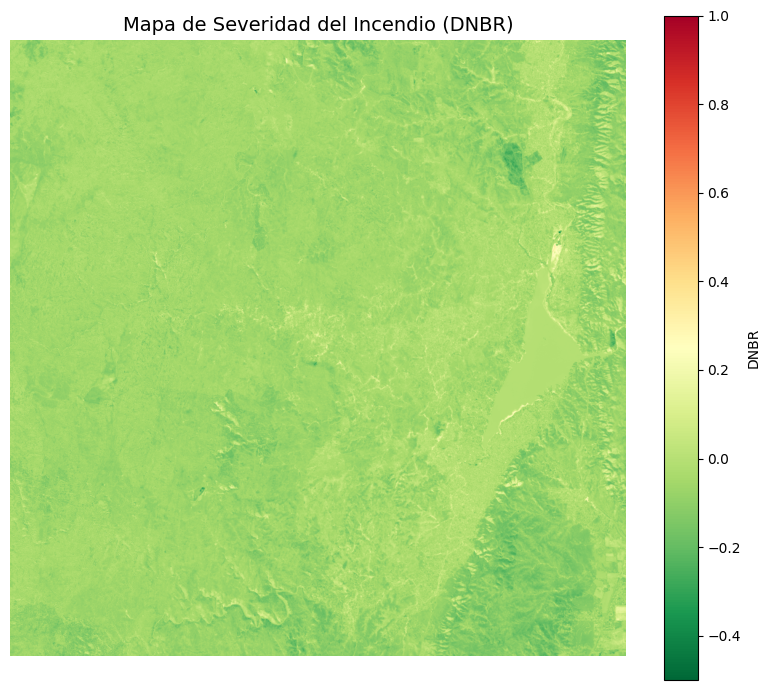

In [ ]:
# Reconstruimos el mapa con el indice DNBR
# No hace falta mostrar el antes y el despues ya que estamos viendo el efecto del incendio
# Si no hubo un incendio antes no hay nada que analizar
dnbr_img = np.full((h, w), np.nan)
dnbr_img[df_desp['fila'], df_desp['columna']] = df_desp['dnbr']

# Mapa DNBR
plt.figure(figsize=(8, 7))
plt.imshow(dnbr_img, cmap='RdYlGn_r', vmin=-0.5, vmax=1.0)
plt.title("Mapa de Severidad del Incendio (DNBR)", fontsize=14)
plt.colorbar(label='DNBR')
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
#dividimos por bloques
block_size = 10
height, width = bandas_antes_crop_dict["B4"].shape

features_agg = []

for row_start in range(0, height, block_size):
    for col_start in range(0, width, block_size):
        # Definimos el bloque
        row_end = min(row_start + block_size, height)
        col_end = min(col_start + block_size, width)

        # Extraemos bloque para cada banda / índice
        red_block_pre = bandas_antes_crop_dict['B4'].values[row_start:row_end, col_start:col_end]
        nir_block_pre = bandas_antes_crop_dict['B5'].values[row_start:row_end, col_start:col_end]
        swir_block_pre = bandas_antes_crop_dict['SWIR'].values[row_start:row_end, col_start:col_end]

        red_block_post = bandas_alineadas['B4'].values[row_start:row_end, col_start:col_end]
        nir_block_post = bandas_alineadas['B5'].values[row_start:row_end, col_start:col_end]
        swir_block_post = bandas_alineadas['SWIR'].values[row_start:row_end, col_start:col_end]

        # Índices
        ndvi_block_pre  = (nir_block_pre - red_block_pre) / (nir_block_pre + red_block_pre)
        ndvi_block_post = (nir_block_post - red_block_post) / (nir_block_post + red_block_post)
        delta_ndvi_block = ndvi_block_post - ndvi_block_pre

        nbr_block_pre  = (nir_block_pre - swir_block_pre) / (nir_block_pre + swir_block_pre)
        nbr_block_post = (nir_block_post - swir_block_post) / (nir_block_post + swir_block_post)
        dnbr_block = nbr_block_pre - nbr_block_post

        ndwi_block_pre = (red_block_pre - nir_block_pre) /(red_block_pre + nir_block_pre)
        ndwi_block_post = (red_block_post - nir_block_post) /(red_block_post + nir_block_post)
        delta_ndwi_block = ndwi_block_post - ndwi_block_pre

        # estadísticas por bloque
          # Features
        features_agg.append({
                "row_start": row_start,
                "col_start": col_start,

                # Promedios espectrales
                "red_pre_mean": np.nanmean(red_block_pre),
                "nir_pre_mean": np.nanmean(nir_block_pre),
                "swir_pre_mean": np.nanmean(swir_block_pre),
                "red_post_mean": np.nanmean(red_block_post),
                "nir_post_mean": np.nanmean(nir_block_post),
                "swir_post_mean": np.nanmean(swir_block_post),

                # NDVI
                "ndvi_pre_mean": np.nanmean(ndvi_block_pre),
                "ndvi_post_mean": np.nanmean(ndvi_block_post),
                "ndvi_pre_min": np.nanmin(ndvi_block_pre),
                "ndvi_post_min": np.nanmin(ndvi_block_post),
                "ndvi_pre_max": np.nanmax(ndvi_block_pre),
                "ndvi_post_max": np.nanmax(ndvi_block_post),
                "ndvi_pre_std": np.nanstd(ndvi_block_pre),
                "ndvi_post_std": np.nanstd(ndvi_block_post),

                # ΔNDVI
                "delta_ndvi_mean": np.nanmean(delta_ndvi_block),
                "delta_ndvi_median": np.nanmedian(delta_ndvi_block),
                "delta_ndvi_max": np.nanmax(delta_ndvi_block),
                "delta_ndvi_min": np.nanmin(delta_ndvi_block),
                "delta_ndvi_std": np.nanstd(delta_ndvi_block),
                "delta_ndvi_extreme_pct": np.mean(np.abs(delta_ndvi_block) > 0.5),

                # dNBR
                "dnbr_mean": np.nanmean(dnbr_block),
                "dnbr_max": np.nanmax(dnbr_block),
                "dnbr_min": np.nanmin(dnbr_block),
                "dnbr_std": np.nanstd(dnbr_block),

                #NDWI:
                "ndwi_pre_mean": np.nanmean(ndwi_block_pre),
                "ndwi_post_mean": np.nanmean(ndwi_block_post),
                "ndwi_pre_min": np.nanmin(ndwi_block_pre),
                "ndwi_post_min": np.nanmin(ndwi_block_post),
                "ndwi_pre_max": np.nanmax(ndwi_block_pre),
                "ndwi_post_max": np.nanmax(ndwi_block_post),
                "ndwi_pre_std": np.nanstd(ndwi_block_pre),
                "ndwi_post_std": np.nanstd(ndwi_block_post),

                #DNDWI:
                "delta_ndwi_mean": np.nanmean(delta_ndwi_block),
                "delta_ndwi_median": np.nanmedian(delta_ndwi_block),
                "delta_ndwi_max": np.nanmax(delta_ndwi_block),
                "delta_ndwi_min": np.nanmin(delta_ndwi_block),
                "delta_ndwi_std": np.nanstd(delta_ndwi_block),
                "delta_ndwi_extreme_pct": np.mean(np.abs(delta_ndwi_block) > 0.5),
            })

df_blocks_desp = pd.DataFrame(features_agg)

In [ ]:
scaler = StandardScaler()
df_blocks_desp_scaled = scaler.fit_transform(df_blocks_desp)

In [ ]:
#aplicamos pca con el modelo entrenado previamente
df_pca_desp = pca.transform(df_blocks_desp_scaled)
df_pca_desp = pd.DataFrame(df_pca_desp, columns=[f'PC{i}' for i in range(1, 6)])


In [ ]:
#aplicamos kmeans
df_blocks_desp["kmeans_cluster"] = kmeans.predict(df_pca_desp)

In [ ]:
#visualizamos los clusters -> k-means
n_rows = int(np.ceil(height / block_size))
n_cols = int(np.ceil(width / block_size))

# Mapa de clusters (inicializado en -1)
cluster_map_kmeans = np.full((n_rows, n_cols), -1)

# Completamos con etiquetas de cluster
for idx, row in df_blocks_desp.iterrows():
    r = row["row_start"] // block_size
    c = row["col_start"] // block_size
    cluster_map_kmeans[int(r), int(c)] = row["kmeans_cluster"]

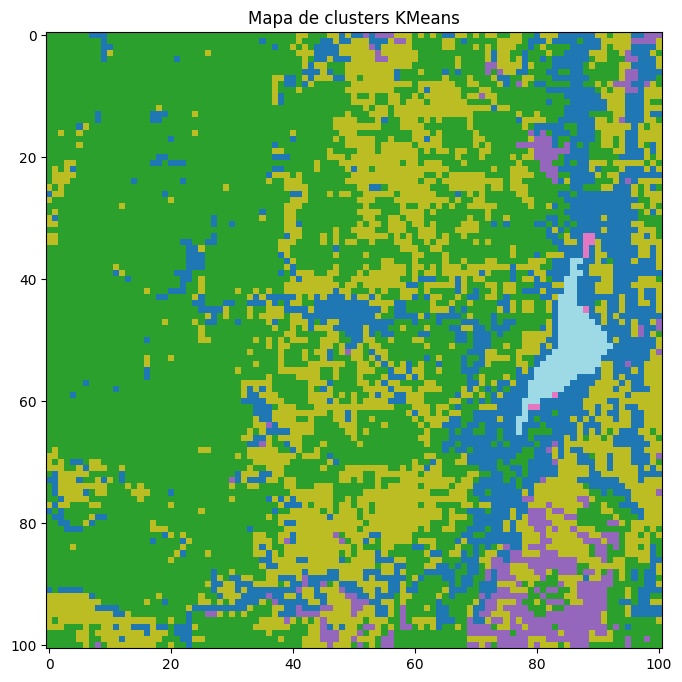

In [ ]:
#visualizamos los clusters haciendo el mapa de KMeans
plt.figure(figsize=(10, 8))
plt.imshow(cluster_map_kmeans, cmap='tab20')
plt.title("Mapa de clusters KMeans")
plt.show()

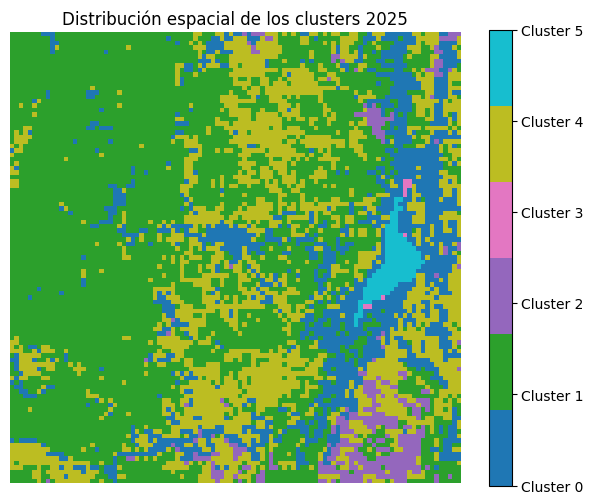

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

# Mostrar clusters con colores categóricos
cmap = plt.get_cmap("tab10", np.unique(cluster_map_kmeans).size)
im = plt.imshow(cluster_map_kmeans, cmap=cmap)
plt.title("Distribución espacial de los clusters 2025")
plt.axis("off")

# Agregar barra de color con ticks por cluster
cbar = plt.colorbar(im, ticks=np.arange(np.unique(cluster_map_kmeans).size))

cbar.set_ticks(np.arange(np.unique(cluster_map_kmeans).size))
cbar.set_ticklabels([f'Cluster {i}' for i in range(np.unique(cluster_map_kmeans).size)])

plt.tight_layout()
plt.show()

In [ ]:
df_blocks_desp.groupby('kmeans_cluster')[
    ['dnbr_mean', 'ndvi_post_mean', 'delta_ndvi_mean',
     'ndwi_post_mean', 'delta_ndwi_mean']
].mean()

dnbr_mean  ndvi_post_mean  delta_ndvi_mean  ndwi_post_mean  \
kmeans_cluster                                                               
0                0.040002        0.158507        -0.003754       -0.158507   
1                0.058020        0.139106        -0.024150       -0.139106   
2                0.140630        0.128407        -0.082301       -0.128407   
3               -0.092384        0.211187         0.181502       -0.211187   
4                0.066973        0.159695        -0.025798       -0.159695   
5                0.005735       -0.007202         0.015625        0.007202   

                delta_ndwi_mean  
kmeans_cluster                   
0                      0.003754  
1                      0.024150  
2                      0.082301  
3                     -0.181502  
4                      0.025798  
5                     -0.015625